# Pymaceuticals Inc.
---

### Overview
Pymaceuticals, Inc. is a new pharmaceutical company that specializes in anti-cancer medications. Leveraging the complete data from their most recent animal study of 248 mice identified with SCC tumors, the performance of Pymaceuticals’ drug of interest, Capomulin, was compared against other treatment regimens.

The below analysis includes all of the tables and figures needed for the technical report of the clinical study, followed by a top-level summary of the study results.

### Analysis 

Data Summary:
Duplicate data for Mouse g989 was removed from the data set
Population was 50.4% male, 49.6% female

Summary Statistics: Tumor Size by Drug





Conclusions:
Tumor volumes were the smallest with Capomulin and Ramicane
There is a strong correlation between mouse weight and average size of tumor
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_study_results["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = mouse_study_results[mouse_study_results.duplicated(["Mouse ID","Timepoint"])]

# Print the resultant Dataframe
duplicates_df = duplicate_mice["Mouse ID"].unique()
duplicates_df

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
bad_data = mouse_study_results.loc[(mouse_study_results["Mouse ID"] == "g989") | (mouse_study_results["Timepoint"] == 0), :]
bad_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26
1195,g989,25,56.045564,1,Propriva,Female,21,26
1380,g989,30,59.082294,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_mouse_study_results = mouse_study_results.drop(bad_data["Mouse ID"].index)
clean_mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21
254,n304,5,46.431216,0,Naftisol,Male,9,26


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count_after_drop = len(clean_mouse_study_results["Mouse ID"].unique())
mouse_count_after_drop

236

In [8]:
init_tumor_size_by_mouse = clean_mouse_study_results.loc[(clean_mouse_study_results["Timepoint"] == 5)]
init_tumor_stats_by_drug = init_tumor_size_by_mouse[["Drug Regimen","Tumor Volume (mm3)"]].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std','sem'])
init_tumor_stats_by_drug


Tumor Volume (mm3)                                         
                           mean     median       var       std       sem
Drug Regimen                                                            
Capomulin             44.266086  45.597064  5.030889  2.242964  0.448593
Ceftamin              46.503051  46.370798  0.568299  0.753856  0.164505
Infubinol             46.541247  46.870483  5.689821  2.385335  0.477067
Ketapril              47.389175  47.059664  1.612964  1.270025  0.264819
Naftisol              46.796098  46.621301  0.942076  0.970606  0.202385
Placebo               47.125589  46.989764  1.141526  1.068422  0.218091
Propriva              47.168130  46.941015  1.345210  1.159832  0.241842
Ramicane              43.944859  45.521875  5.831150  2.414777  0.482955
Stelasyn              47.470830  47.054185  1.493585  1.222123  0.254830
Zoniferol             46.851818  46.736212  0.856853  0.925664  0.188950

In [9]:
final_timepts = clean_mouse_study_results.groupby("Mouse ID")["Timepoint"].last()
final_timepts_df = final_timepts.to_frame()
final_timepts_df.reset_index(inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_size_by_mouse = pd.merge(final_timepts_df,clean_mouse_study_results,how="left",on=["Mouse ID","Timepoint"])

final_tumor_stats_by_drug = final_tumor_size_by_mouse[["Drug Regimen","Tumor Volume (mm3)"]].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std','sem'])
final_tumor_stats_by_drug


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             36.667568  38.125164  32.663378  5.715188  1.143038
Ceftamin              60.183306  61.433892  45.249776  6.726795  1.467907
Infubinol             58.178246  60.165180  74.010875  8.602957  1.720591
Ketapril              64.354556  65.415955  76.584093  8.751234  1.824758
Naftisol              62.614953  63.586395  89.717770  9.471946  1.975037
Placebo               61.154598  62.727144  71.291431  8.443425  1.723507
Propriva              56.993618  55.841410  67.775914  8.232613  1.716618
Ramicane              36.191390  36.561652  32.166354  5.671539  1.134308
Stelasyn              61.697433  62.765093  82.292684  9.071532  1.891545
Zoniferol             59.772144  61.974855  71.095699  8.431827  1.721139

In [10]:
tumor_size_change = pd.merge(init_tumor_stats_by_drug,final_tumor_stats_by_drug,on="Drug Regimen")
tumor_size_change

Tumor Volume (mm3)_x                                           \
                             mean     median       var       std       sem   
Drug Regimen                                                                 
Capomulin               44.266086  45.597064  5.030889  2.242964  0.448593   
Ceftamin                46.503051  46.370798  0.568299  0.753856  0.164505   
Infubinol               46.541247  46.870483  5.689821  2.385335  0.477067   
Ketapril                47.389175  47.059664  1.612964  1.270025  0.264819   
Naftisol                46.796098  46.621301  0.942076  0.970606  0.202385   
Placebo                 47.125589  46.989764  1.141526  1.068422  0.218091   
Propriva                47.168130  46.941015  1.345210  1.159832  0.241842   
Ramicane                43.944859  45.521875  5.831150  2.414777  0.482955   
Stelasyn                47.470830  47.054185  1.493585  1.222123  0.254830   
Zoniferol               46.851818  46.736212  0.856853  0.925664  0.188950   

             Tumor Volume (mm3)_y                                            
                             mean     median        var       std       sem  
Drug Regimen                                                                 
Capomulin               36.667568  38.125164  32.663378  5.715188  1.143038  
Ceftamin                60.183306  61.433892  45.249776  6.726795  1.467907  
Infubinol               58.178246  60.165180  74.010875  8.602957  1.720591  
Ketapril                64.354556  65.415955  76.584093  8.751234  1.824758  
Naftisol                62.614953  63.586395  89.717770  9.471946  1.975037  
Placebo                 61.154598  62.727144  71.291431  8.443425  1.723507  
Propriva                56.993618  55.841410  67.775914  8.232613  1.716618  
Ramicane                36.191390  36.561652  32.166354  5.671539  1.134308  
Stelasyn                61.697433  62.765093  82.292684  9.071532  1.891545  
Zoniferol               59.772144  61.974855  71.095699  8.431827  1.721139

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_stddev = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_stderr = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_stats = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                    "Median Tumor Volume": tumor_median,
                                    "Tumor Volume Variance": tumor_variance,
                                    "Tumor Volume Std. Dev.": tumor_stddev,
                                    "Tumor Volume Std. Err.": tumor_stderr})
tumor_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.148392,40.716428,25.434058,5.043219,0.352234
Ceftamin,53.831559,52.847559,34.725752,5.892856,0.476409
Infubinol,54.173160,53.244458,38.326085,6.190806,0.500497
Ketapril,56.805521,56.098998,60.485143,7.777219,0.609159
Naftisol,55.780565,54.234502,60.794406,7.797077,0.614496
Placebo,55.481270,53.354528,55.762387,7.467422,0.597872
Propriva,53.737884,52.663801,39.926662,6.318755,0.567441
Ramicane,39.627674,39.769552,23.213127,4.818000,0.338157
Stelasyn,55.644586,54.328317,53.476333,7.312751,0.583621


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary = clean_mouse_study_results[["Drug Regimen","Tumor Volume (mm3)"]].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std','sem'])
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.148392  40.716428  25.434058  5.043219  0.352234
Ceftamin              53.831559  52.847559  34.725752  5.892856  0.476409
Infubinol             54.173160  53.244458  38.326085  6.190806  0.500497
Ketapril              56.805521  56.098998  60.485143  7.777219  0.609159
Naftisol              55.780565  54.234502  60.794406  7.797077  0.614496
Placebo               55.481270  53.354528  55.762387  7.467422  0.597872
Propriva              53.737884  52.663801  39.926662  6.318755  0.567441
Ramicane              39.627674  39.769552  23.213127  4.818000  0.338157
Stelasyn              55.644586  54.328317  53.476333  7.312751  0.583621
Zoniferol             54.548052  53.287287  43.708157  6.611214  0.527632

## Bar and Pie Charts

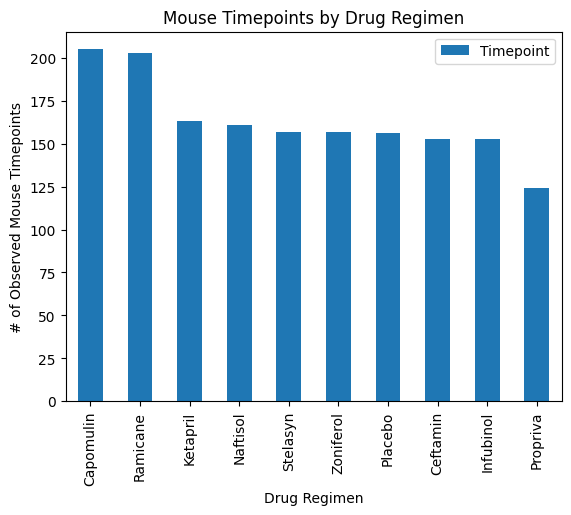

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Get the data from the clean results and put it into a dataframe
timepts_by_drug = clean_mouse_study_results.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
timepts_by_drug_df = timepts_by_drug.to_frame()

# Generate the bar plot from the dataframe
timepts_by_drug_df.plot(kind="bar",title = "Mouse Timepoints by Drug Regimen",
                     xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")
plt.show()

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


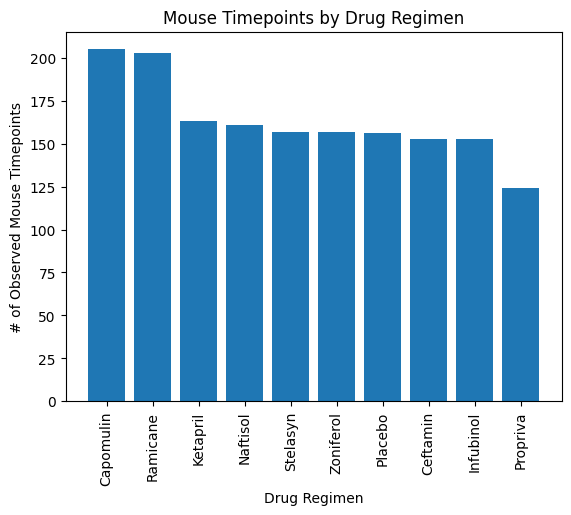

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Get the data to be plotted
drugs=timepts_by_drug_df.index
timepts=timepts_by_drug_df["Timepoint"]

# Set the title and axis labels
plt.title("Mouse Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]
# Plot the bar chart with the tick labels
plt.bar(drugs, timepts, align="center")
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.show()

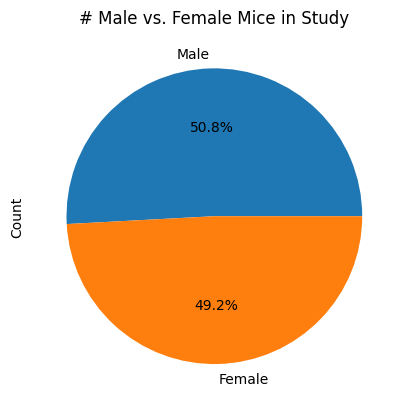

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_by_gender = clean_mouse_study_results.groupby(["Sex","Mouse ID"]).count()
num_mice_by_gender = mice_by_gender.groupby("Sex")["Timepoint"].count().sort_values(ascending=False)

# Make the pie chart
num_mice_by_gender.plot(kind="pie", title="# Male vs. Female Mice in Study",
                                 y="Timepoint", autopct="%1.1f%%", ylabel="Count")
plt.show()

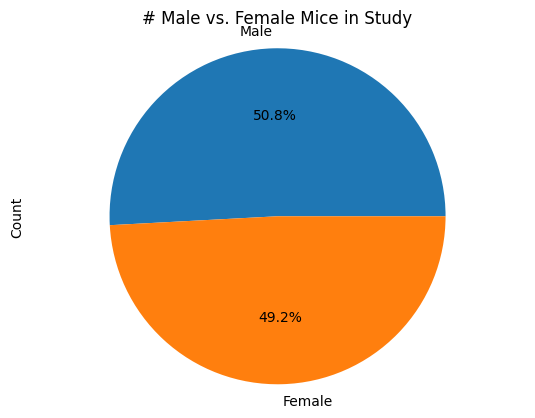

In [19]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
num_mice_by_gender_df = num_mice_by_gender.to_frame()

gender = num_mice_by_gender_df.index
counts = num_mice_by_gender_df["Timepoint"]

# Make the pie chart
plt.title("# Male vs. Female Mice in Study")
plt.ylabel("Count")
plt.pie(counts, labels=gender, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Reduce the study data to the four focus drugs
drug_study_df = clean_mouse_study_results.loc[(clean_mouse_study_results["Drug Regimen"] == "Capomulin") |
                                              (clean_mouse_study_results["Drug Regimen"] == "Ramicane") |
                                              (clean_mouse_study_results["Drug Regimen"] == "Infubinol") |
                                              (clean_mouse_study_results["Drug Regimen"] == "Ceftamin"),:]

# Start by getting the last (greatest) timepoint for each mouse
last_timepts = drug_study_df.groupby("Mouse ID")["Timepoint"].last()
last_timepts_df = last_timepts.to_frame()
last_timepts_df.reset_index(inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_by_mouse = pd.merge(last_timepts_df,clean_mouse_study_results,how="left",on=["Mouse ID","Timepoint"])
final_tumor_vol_by_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments: 
    outliers = []
    drug_df = final_tumor_vol_by_mouse.loc[(final_tumor_vol_by_mouse["Drug Regimen"] == drug),["Tumor Volume (mm3)"]]

    # add subset
    drug_df.reset_index(drop=True,inplace=True)
    tumor_vol_data.append(drug_df) 
        
    # Determine outliers using upper and lower bounds
    quartiles = drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    medq = quartiles[0.5]
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]    
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Capture outlier data 
    outliers.append(drug_df.loc[(drug_df["Tumor Volume (mm3)"] < lower_bound) | (drug_df["Tumor Volume (mm3)"] > upper_bound),["Tumor Volume (mm3)"]])  
    
    # Print outlier information to terminal for each drug
    print(f"{drug}'s outliers include any tumors smaller than {lower_bound} or larger than {upper_bound}: {outliers}")


Capomulin's outliers include any tumors smaller than 20.70456164999999 or larger than 51.83201549: [Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []]
Ramicane's outliers include any tumors smaller than 17.912664470000003 or larger than 54.30681135: [Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []]
Infubinol's outliers include any tumors smaller than 36.83290494999999 or larger than 82.74144559000001: [   Tumor Volume (mm3)
5           36.321346]
Ceftamin's outliers include any tumors smaller than 43.19194942 or larger than 77.50074854: [Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []]


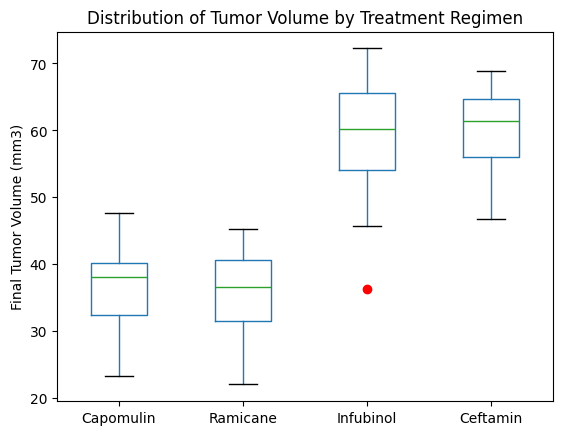

In [22]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plotting_df = pd.concat(tumor_vol_data,axis=1,ignore_index=True)

# Display any outliers as a red circle
plotting_df.boxplot(grid=False, sym='ro')

x_axis = np.arange(len(treatments)) + 1
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatments)
plt.title("Distribution of Tumor Volume by Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

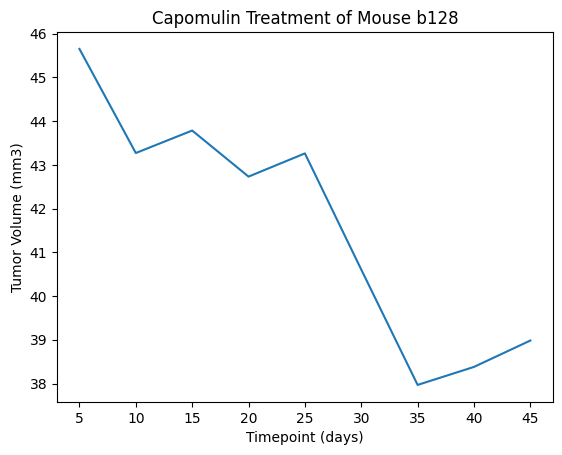

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose the mouse and drug to test
test_mouse = "b128"
test_drug = "Capomulin"

# Get the data for the chosen mouse and drug 
single_mouse_df = drug_study_df.loc[(drug_study_df["Mouse ID"] == test_mouse) & (drug_study_df["Drug Regimen"] == test_drug)]

# Generate the line graph for chosen mouse and drug
x_axis = np.arange(len(single_mouse_df))
tick_locations = [value for value in x_axis]
plt.plot(x_axis, single_mouse_df["Tumor Volume (mm3)"])
plt.xticks(tick_locations, single_mouse_df["Timepoint"])
plt.title(f'{test_drug} Treatment of Mouse {test_mouse}')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

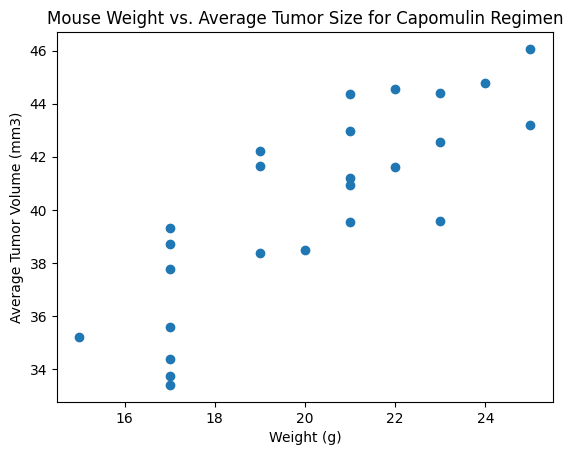

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Drug to test was set in the previous cell - it can be changed if desired
test_drug = test_drug

# Get all data for chosen drug
single_drug_df = drug_study_df.loc[(drug_study_df["Drug Regimen"] == test_drug)]

# Calculate the average tumor size for each mouse being treated with chosen drug
avg_tumor_data = single_drug_df.groupby("Mouse ID").mean("Tumor Volume(mm3)")

# Generate scatter plot comparing mouse weight to average tumor size for all mice being treated with chosen drug
plt.scatter(avg_tumor_data["Weight (g)"], avg_tumor_data["Tumor Volume (mm3)"])
plt.title(f'Mouse Weight vs. Average Tumor Size for {test_drug} Regimen')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.83


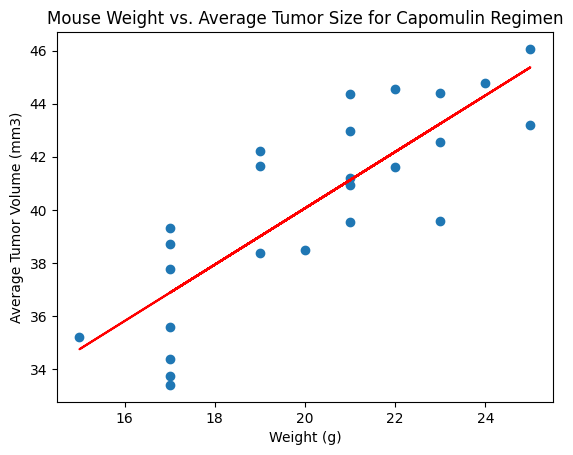

In [25]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# get weights and tumor sizes from above data isolated to Capomulin
weights = avg_tumor_data["Weight (g)"]
tumor_vols = avg_tumor_data["Tumor Volume (mm3)"]

# Display the correlation coefficient information to the terminal
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weights,tumor_vols)[0],2)}")

# Calculate the linear regression for graphing
m_slope, m_int, m_r, m_p, m_stderr = st.linregress(weights, tumor_vols)
m_regress = m_slope * weights + m_int
line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(m_int,2))

# Generage the scatter plot and linear regression model
plt.scatter(weights, tumor_vols)
plt.plot(weights,m_regress,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title(f'Mouse Weight vs. Average Tumor Size for {test_drug} Regimen')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
